In [ ]:
#Capstone Project 1 - Toddler Austism Data Set - July 2018

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
os.getcwd()
os.chdir('C:\\Users\\SMP\\Springboard_DSCT\\Cap1')
os.getcwd()

'C:\\Users\\SMP\\Springboard_DSCT\\Cap1'

In [3]:
tdlrasd = pd.read_csv('Toddler_Autism_dataset_July_2018.csv', index_col=None)

In [4]:
print(tdlrasd.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD_Traits   
0                No  
1     

In [4]:
tdlrasd.columns = tdlrasd.columns.str.replace(' ', '_')
tdlrasd.columns = tdlrasd.columns.str.replace(r"_$", "")

print(tdlrasd.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'Class/ASD_Traits'],
      dtype='object')


In [6]:
print(tdlrasd.head())

   Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who_completed_the_test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD_Traits  
0               No  
1       

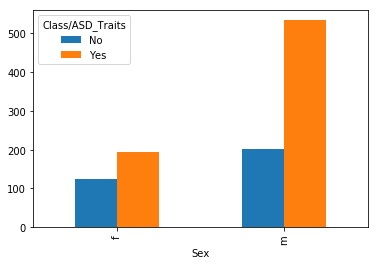

In [5]:
#Visualize value of Class/ASD_Traits by gender (Sex)
pd.crosstab(tdlrasd['Sex'], tdlrasd['Class/ASD_Traits']).plot.bar()

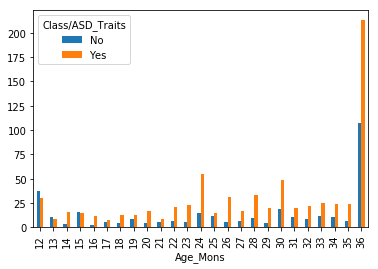

In [6]:
#Visualize value of Class/ASD_Traits by Age
pd.crosstab(tdlrasd['Age_Mons'], tdlrasd['Class/ASD_Traits']).plot.bar()

In [7]:
#Create age range series

def age_range(months):
    if (months >= 12) & (months <= 16):
        return '12-16'
    elif (months >= 17) & (months <= 21):
        return '17-21'
    elif (months >= 22) & (months <= 26):
        return '22-26'
    elif (months >= 27) & (months <= 31):
        return '27-31'
    else:
        return '32-36'

tdlrasd['Age_Range'] = tdlrasd['Age_Mons'].apply(age_range)

print(tdlrasd.info())

print(tdlrasd.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 20 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who_completed_the_test    1054 non-null object
Class/ASD_Traits          1054 non-null object
Age_Range    

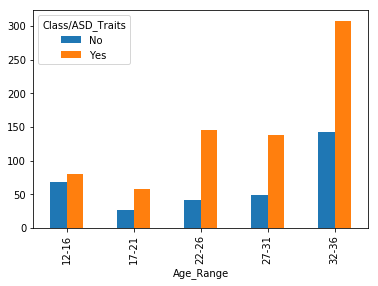

In [8]:
#Visualize value of Class/ASD_Traits by Age Range
pd.crosstab(tdlrasd['Age_Range'], tdlrasd['Class/ASD_Traits']).plot.bar()

In [23]:
#Look at average Qchat-10-Score, sum of ASD ('A') trait observations, by age range.
tdlrasd.groupby('Age_Range')['Qchat-10-Score'].mean().sort_values(ascending=False)


Age_Range
27-31    5.639785
17-21    5.626506
22-26    5.566845
32-36    5.008889
12-16    4.614865
Name: Qchat-10-Score, dtype: float64

In [17]:
#Count Yes responses for Class/ASD_Traits.
tdlrasd.groupby('Age_Range')[tdlrasd['Class/ASD_Traits'] == 'Yes'].size()

KeyError: 'Columns not found: False, True'

In [19]:
#Look at average Qchat-10-Score, sum of ASD ('A') trait observations, by ethnicity.
tdlrasd.groupby('Ethnicity')['Qchat-10-Score'].mean().sort_values(ascending=False)


Ethnicity
Pacifica          7.000000
Native Indian     7.000000
Latino            5.923077
black             5.716981
White European    5.715569
Others            5.628571
Hispanic          5.600000
south asian       5.016667
asian             4.983278
mixed             4.625000
middle eastern    4.265957
Name: Qchat-10-Score, dtype: float64

In [10]:
tdlrasd.loc[tdlrasd['Class/ASD_Traits'] == 'Yes'].groupby('Ethnicity').count()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class/ASD_Traits,Age_Range
Ethnicity,,,,,,,,,,,,,,,,,,,
Hispanic,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Latino,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Native Indian,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Others,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
Pacifica,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
White European,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
asian,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
black,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
middle eastern,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96


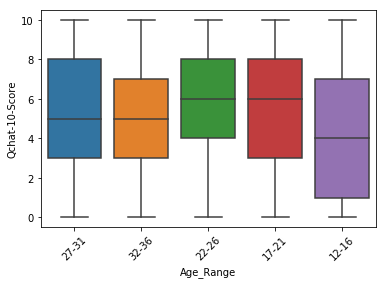

In [25]:
#Look box plot of Qchat-10-Score, sum of ASD ('A') trait observations, by age range.
sb.boxplot(x='Age_Range', y='Qchat-10-Score', data=tdlrasd)
plt.xticks(rotation=45)
plt.show()


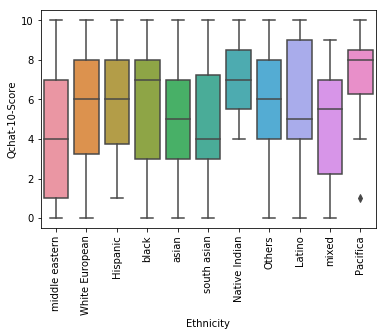

In [27]:
#Look box plot of Qchat-10-Score, sum of ASD ('A') trait observations, by ethnicity.
sb.boxplot(x='Ethnicity', y='Qchat-10-Score', data=tdlrasd)
plt.xticks(rotation=90)
plt.show()

